# **`Problema de los Sombreros en el Banquete 🎩`**

# **`Enunciado`**

Imagina que organizas un banquete con \( n \) invitados. Al llegar, cada invitado deja su sombrero en el guardarropa. Al finalizar el banquete, cada invitado recoge un sombrero **al azar**, que podría no ser el suyo. Queremos calcular la probabilidad de que **ningún invitado recupere su propio sombrero**. Esta situación se modela como el problema de las *derangements* (o permutaciones sin puntos fijos).



# **`Formula`**

El número de desarreglos (o permutaciones sin puntos fijos) para ( n ) elementos, denotado como ( !n ), se calcula con la fórmula:

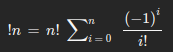

## **`Desglose De La Fórmula`**

- **\( n! \)**: Factorial de \( n \), que cuenta todas las posibles permutaciones de \( n \) elementos.
- 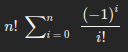: Serie alternante que ajusta el conteo para que ningún elemento quede en su lugar original. Esta serie se conoce como la **suma de desarreglos**.

## **`Ejemplo Para n = 3`**

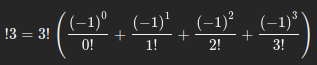

Desglosando el cálculo paso a paso:

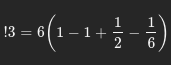

Simplificando la expresión:

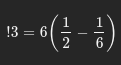

Sumando los términos:

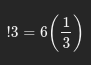

Multiplicando por 6:

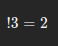

Así, hay 2 desarreglos para n = 3 \.

# **`Probabilidad`**

La probabilidad de que ningún invitado recoja su propio sombrero para \( n \) invitados es:

P(ningún sombrero correcto) = 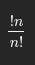

Esta fórmula da la fracción de permutaciones que son desarreglos.

## **`Desglose De La Fórmula`**

- \( !n \): Número de desarreglos.
- \( n! \): Total de todas las posibles permutaciones de \( n \) elementos.

## **`Ejemplo: Para n = 3:`**

\[ !3 = 2 \] (como calculamos anteriormente)

\[ 3! = 6 \] (total de permutaciones)

Entonces la probabilidad es:

 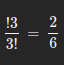


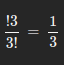


# **`Código`**

In [10]:
# Importación de bibliotecas
import math

# Función para calcular desarreglos
def n_desarreglos(n):
    return int(math.factorial(n) * sum((-1)**i / math.factorial(i) for i in range(n + 1)))


# Función para calcular probabilidad
def p_desarreglo(n, desarreglos):
    total_permutaciones = math.factorial(n)
    return desarreglos / total_permutaciones

# Solicitar al usuario el valor de n
n = int(input("Ingrese el número de invitados (n): "))

# Calcular número de desarreglos y su probabilidad
desarreglos = n_desarreglos(n)
probabilidad = p_desarreglo(n, desarreglos)

# --- Mostrar resultados ---
print(f"\nPara n = {n}:")
print(f"Número de desarreglos: {desarreglos}")
print(f"Probabilidad de que ningún sombrero sea correcto: {probabilidad:.6f}")


Ingrese el número de invitados (n): 3

Para n = 3:
Número de desarreglos: 2
Probabilidad de que ningún sombrero sea correcto: 0.333333


La tendencia a alrededor del 37% (o más precisamente, 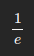, donde 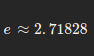

Es un resultado interesante que se deriva de la teoría detrás del problema del banquete.

Cuando el número de invitados \( n \) se hace muy grande, el número de desarreglos \( !n \) se aproxima a 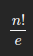.

Esto significa que, en un gran banquete, hay aproximadamente 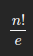 desarreglos posibles.

Por otro lado, el número total de permutaciones posibles de los sombreros es \( n! \), ya que cada invitado puede tomar cualquier sombrero.

Por lo tanto, la probabilidad de que ningún invitado reciba su propio sombrero, que es igual al número de desarreglos dividido por el número total de permutaciones, se aproxima a 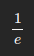.

Este resultado muestra que, en promedio, alrededor del 37% de los invitados no recibirán su propio sombrero en un gran banquete.


# **`Coloreado De Grafos`**

## **`Teoria`**

El **coloreado de grafos** es un concepto fundamental en teoría de grafos que involucra asignar colores a los nodos de un grafo de manera que ningún par de nodos adyacentes tenga el mismo color. En el contexto del problema del banquete, podemos utilizar el coloreado de grafos para encontrar el número mínimo de colores necesarios para colorear los nodos de un grafo bipartito de manera que ningún par de nodos adyacentes (invitado y sombrero) tenga el mismo color.

## **`Creación`**

Primero, creamos un **grafo bipartito** donde un conjunto de nodos representa a los invitados y otro conjunto representa a los sombreros. Cada arista entre un invitado y un sombrero indica una posible asignación de ese sombrero al invitado.

## **`Coloreado`**

Luego, utilizamos un algoritmo de coloreado de grafos para encontrar una asignación de colores a los nodos de manera que ningún par de nodos adyacentes tenga el mismo color. En este caso, utilizamos el algoritmo greedy, que asigna colores a los nodos en un orden específico, utilizando el primer color disponible que no se haya utilizado en los nodos adyacentes.

## **`Interpretación`**


#### 3. Interpretación de los Resultados

Una vez que hemos coloreado el grafo, podemos interpretar los resultados. Cada color representa un grupo de nodos que no están conectados directamente entre sí en el grafo original. En el contexto del problema del banquete, esto significa que los invitados que tienen el mismo color no han recibido sus propios sombreros.

## **`Algoritmo`**

Ingrese el número de invitados (n): 3




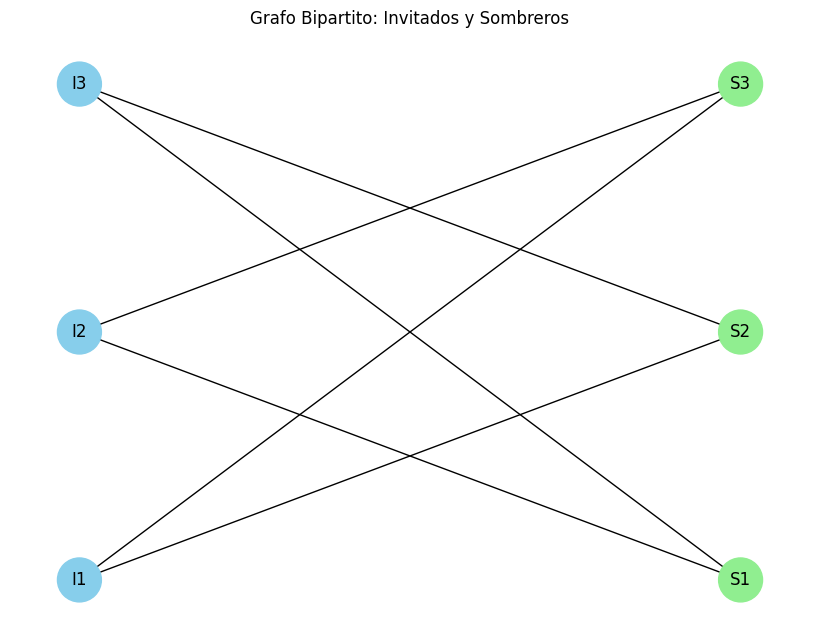


Colores asignados:
I1: Color 0
I2: Color 0
I3: Color 0
S1: Color 1
S2: Color 1
S3: Color 1


In [12]:
# Importación de bibliotecas
import networkx as nx
import matplotlib.pyplot as plt

# Contruir grafo bipartito
def grafo(n):
    G = nx.Graph()

    # Crear nodos
    invitados = [f'I{i}' for i in range(1, n+1)]
    sombreros = [f'S{i}' for i in range(1, n+1)]
    G.add_nodes_from(invitados, bipartite=0)
    G.add_nodes_from(sombreros, bipartite=1)

    # Crear aristas (cada invitado puede tomar cualquier sombrero excepto el suyo)
    edges = [(f'I{i}', f'S{j}') for i in range(1, n+1) for j in range(1, n+1) if i != j]
    G.add_edges_from(edges)

    return G, invitados, sombreros

def colorear_grafo(G):
    return nx.coloring.greedy_color(G, strategy='largest_first')

# Solicitar al usuario el valor de n
n = int(input("Ingrese el número de invitados (n): "))

print("\n")

# Construir el grafo
G, invitados, sombreros = grafo(n)

# Posición para visualización
pos = {**{f'I{i}': (0, i) for i in range(1, n+1)}, **{f'S{i}': (1, i) for i in range(1, n+1)}}

plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color=['skyblue']*n + ['lightgreen']*n, node_size=1000)
plt.title('Grafo Bipartito: Invitados y Sombreros')
plt.show()

# Colorear el grafo
colores = colorear_grafo(G)

# Mostrar resultados
print("\nColores asignados:")
for nodo, color in colores.items():
    print(f"{nodo}: Color {color}")
